In [16]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
import random as rnd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
train = pd.read_csv(r"C:\Users\Nathan Campbell\Documents\Machine Leaning\Homeworks\Homework 1\Titanic\train.csv") 
#importing the train.csv file

test = pd.read_csv(r"C:\Users\Nathan Campbell\Documents\Machine Leaning\Homeworks\Homework 1\Titanic\test.csv") 
#importing the test.csv file

combine = [train, test]
combinedf = pd.concat(combine)
#We are using the same dataset from the previous homework. So I will be importing from there

C:\Users\Nathan Campbell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
train.head() #you can see the features of the data set here

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe() #looking at the table to do further analysis, helps you find the stats infor like: Mean, SD, min, Max, etc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.columns.values
#here shows all the names of each column. This totals to be 12

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
#we'll need to change a lot of the variables into numeric data. 
#Furthermore, we will need to also deal with the missing values
#evaulate the amount of missing values

Eval = train.isnull().sum().sort_values(ascending=False)
percent1 = train.isnull().sum()/train.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingdata = pd.concat([Eval, percent2], axis=1, keys=['Total', '%'])
missingdata.head(5)

In [9]:
train["Ticket"].duplicated().sum()

210

In [ ]:
#since Cabin has the most missing variables we can drop that column

In [ ]:
surv = 'survived'
notsurv = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

#organize and seperate males and females
men = train[train['Sex']=='male']
women = train[train['Sex']=='female']

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = surv, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = notsurv, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = surv, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = notsurv, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

C:\Users\Nathan Campbell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


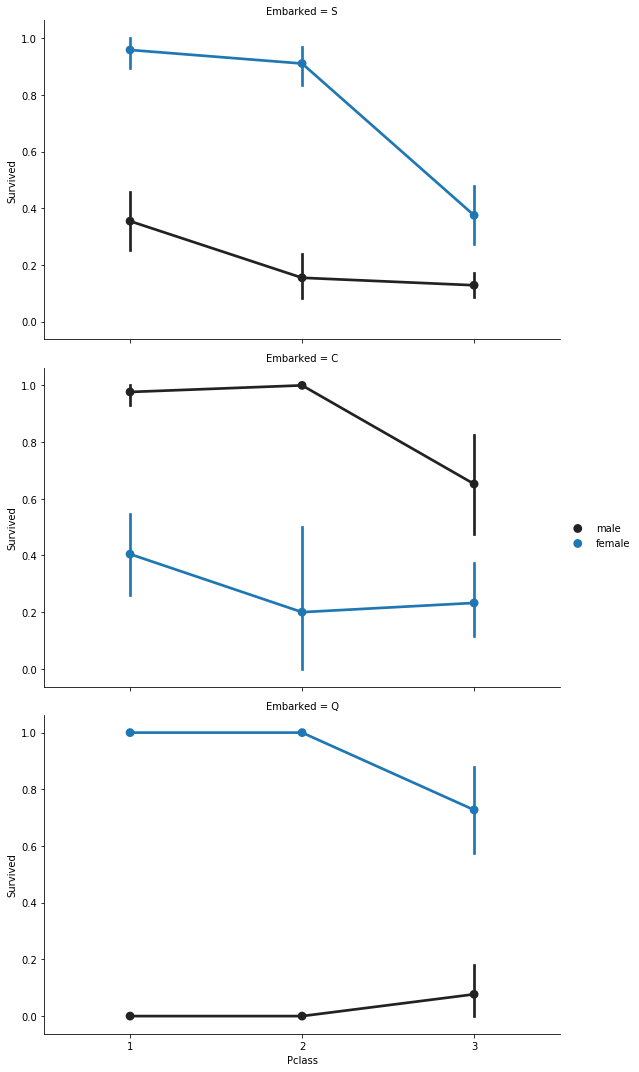

In [10]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size = 5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None,  order = None, hue_order = None )
FacetGrid.add_legend()

#here shows that depending on the gender, embarked correlates with survival

In [ ]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train) 
#This Shows that the class that the individuals were in plays a role on their survival.

grid = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins=20)
grid.add_legend();
#This shows that 3rd class has the lowest survival rate

C:\Users\Nathan Campbell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


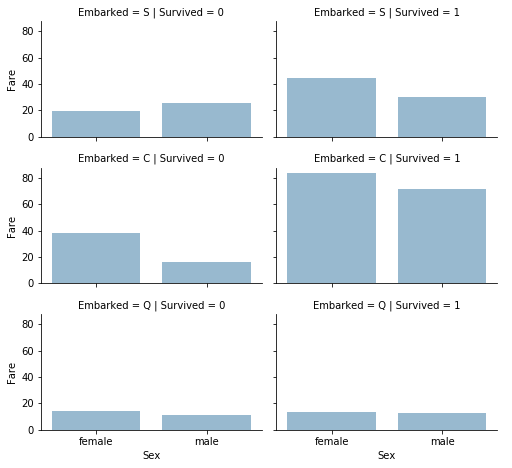

In [13]:
embsexfare = sns.FacetGrid(train, row = 'Embarked', col = 'Survived', size = 2.2, aspect = 1.6)
embsexfare.map(sns.barplot, 'Sex', 'Fare', alpha = .5, ci = None)
embsexfare.add_legend()
plt.show()

In [ ]:
#we will combine sibling, parents, and spouses into a variable "not alone"

for dataset in combine:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

In [ ]:
axes = sns.factorplot('relatives','Survived', 
                      data = train, aspect = 2.5)

In [ ]:
train = train.drop(['PassengerId'], axis = 1)
test = test.drop(['PassengerId'], axis = 1)

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [ ]:
commonvalue = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(commonvalue)

In [ ]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
#Here we will extract the titles of individuals for future use

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [ ]:
#convert sex into numeric data
genders = {"male": 0, "female": 1}
combine = [train, test]

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
#here we can check the summary of the tickets
train['Ticket'].describe()

#drop the ticket data due to it being unique
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [ ]:
#Here we will convert the Embarked feature into numeric data
ports = {"S": 0, "C": 1, "Q": 2}
combine = [train, test]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
#here we will organize the age of individuals into different sections
for x in range(len(train["Age"])):
    if train["Age"][x] < 15:
        train["Age"][x] = 0
    if 15 <= train["Age"][x] < 24:
        train["Age"][x] = 1
    if 24 <= train["Age"][x] < 35:
        train["Age"][x] = 2
    if 35 <= train["Age"][x] < 50:
        train["Age"][x] = 3
    if train["Age"][x] > 50:
        train["Age"][x] = 4
        
train["Age"] = train["Age"].fillna(1)


############################################


for x in range(len(test["Age"])):
    if test["Age"][x] < 15:
        test["Age"][x] = 0
    if 15 <= test["Age"][x] < 24:
        test["Age"][x] = 1
    if 24 <= test["Age"][x] < 35:
        test["Age"][x] = 2
    if 35 <= test["Age"][x] < 50:
        test["Age"][x] = 3
    if test["Age"][x] > 50:
        test["Age"][x] = 4
        
test["Age"] = test["Age"].fillna(1)


#now lets see how this is distributed

train['Age'].value_counts()

In [ ]:
for x in range(len(train["Fare"])):
    if train["Fare"][x] < 15:
        train["Fare"][x] = 0
    if 15 <= train["Fare"][x] < 24:
        train["Fare"][x] = 1
    if 24 <= train["Fare"][x] < 35:
        train["Fare"][x] = 2
    if 35 <= train["Fare"][x] < 50:
        train["Fare"][x] = 3
    if 50 <= train["Fare"][x] < 65:
        train["Fare"][x] = 4
    if train["Fare"][x] >= 65:
        train["Fare"][x] = 5
    
for x in range(len(test["Fare"])):
    if test["Fare"][x] < 15:
        test["Fare"][x] = 0
    if 15 <= test["Fare"][x] < 24:
        test["Fare"][x] = 1
    if 24 <= test["Fare"][x] < 35:
        test["Fare"][x] = 2
    if 35 <= test["Fare"][x] < 50:
        test["Fare"][x] = 3
    if 50 <= test["Fare"][x] < 65:
        test["Fare"][x] = 4
    if test["Fare"][x] >= 65:
        test["Fare"][x] = 5

In [ ]:
for dataset in combine:
    dataset['AgeClass'] = dataset['Age']* dataset['Pclass']

In [ ]:
for dataset in combine:
    dataset['Fare/Person'] = dataset['Fare']/(dataset['relatives']+1)
   # dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    

# before we start the training of the models, we will check to see if everything worked.
train.head(10)

In [ ]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

In [17]:
age_Train_Mean = train["Age"].mean()
age_Train_StdDev = train["Age"].std()
age_Test_Mean = test["Age"].mean()
age_Test_StdDev = test["Age"].std()
train["Age"] = train["Age"].fillna(rnd.uniform(age_Train_Mean - age_Train_StdDev, age_Train_Mean + age_Train_StdDev))
test["Age"] = test["Age"].fillna(rnd.uniform(age_Test_Mean - age_Test_StdDev, age_Test_Mean + age_Test_StdDev))

In [ ]:
train["Fare"].mode()
train["Fare"]=train["Fare"].fillna(train["Fare"].mode())

In [ ]:
combine['fareBand'] = pd.cut(x = combine['fare'], bins = [-0.001, 7.91, 14.454, 31.0, 512.329])
combine['OrdFare'] = pd.cut(x = combine['fare'], bins = [-0.001, 7.91, 14.454, 31.0, 512.329], labels = ['0', '1', '2', '3'])
print(combine)

In [ ]:
train["Ticket"].duplicated().sum()
train["Cabin"].isnull().sum()
test["Cabin"].isnull().sum()